# **WEB TECHNOLOGIES**
### The ***HTTP*** protocol

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches



### 1. Impact of Number of Parallel TCP connections on the page load time
#### All considered websites have been chosen to use the HTTP/1.1 version

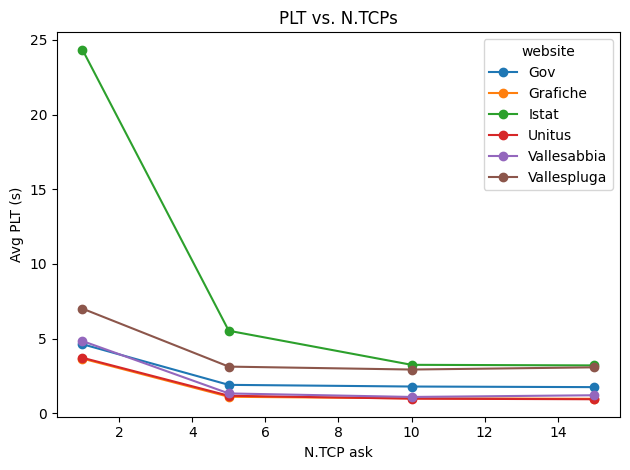

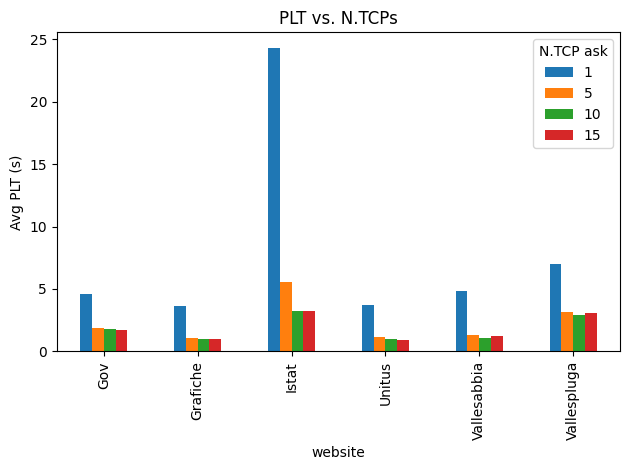

In [2]:
df_tcp = pd.read_csv('../Code/Data/1_tcp_change.csv')
df_tcp['avg']=df_tcp.iloc[:,3:].mean(1)
df_tcp_pivot = df_tcp.pivot(index='N.TCP ask', columns='website', values='avg')
df_tcp_pivot.plot(rot=0, marker='o', markersize=6,ylabel = 'Avg PLT (s)', title = 'PLT vs. N.TCPs')
plt.tight_layout()

df_tcp_pivot=df_tcp_pivot = df_tcp.pivot(index='website', columns='N.TCP ask', values='avg')
df_tcp_pivot.plot(kind = 'bar', ylabel='Avg PLT (s)', title = 'PLT vs. N.TCPs')
plt.tight_layout()

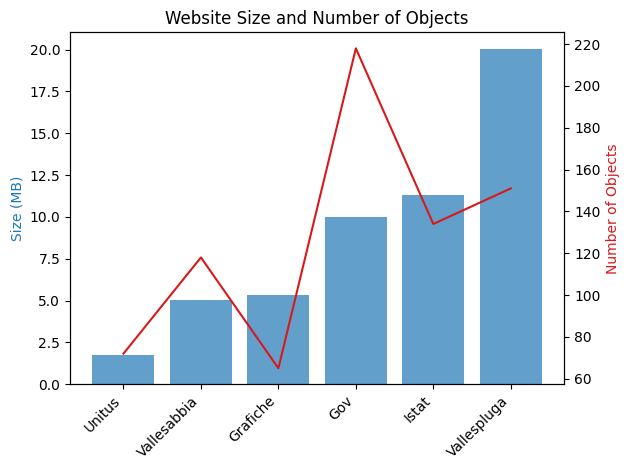

In [3]:
df_tcp_info = pd.read_csv('../Code/Data/1_sites_info.csv')

# Sort the DataFrame based on 'size(MB)' column
df_tcp_info_sorted = df_tcp_info.sort_values('size(MB)')

# Generate sequential numbers for x-axis ticks
x = range(len(df_tcp_info_sorted))

# Create a figure and axis objects
fig, ax1 = plt.subplots()

# Plot 'size(MB)' as a bar plot
ax1.bar(x, df_tcp_info_sorted['size(MB)'], color='#1f77b4', alpha=0.7)
ax1.set_ylabel('Size (MB)', color='#1f77b4')

# Create a second y-axis for 'n_objects'
ax2 = ax1.twinx()

# Plot 'n_objects' as a line plot
ax2.plot(x, df_tcp_info_sorted['n_objects'], color='#d7191c')
ax2.set_ylabel('Number of Objects', color='#d7191c')

# Set x-axis ticks and labels
ax1.set_xticks(x)
ax1.set_xticklabels(df_tcp_info_sorted['website'], rotation=45, ha='right')

# Title for the chart
plt.title('Website Size and Number of Objects')

# Display the chart
plt.tight_layout()
plt.show()

### 2. Investigating impact of **caching policies** on the Page Load Time
#### Considered cases are: ***no-cache, validation, expiration + validation***

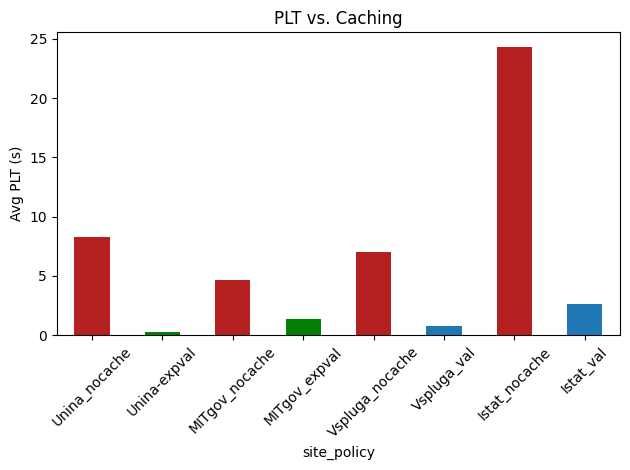

In [4]:
df_caching = pd.read_csv('../Code/Data/2_caching.csv')
df_caching['avg']=df_caching.iloc[:,1:].mean(1)

#investigate the effect of caching
c = ['#b41f1f', 'green', '#b41f1f','green','#b41f1f','#1f77b4','#b41f1f','#1f77b4']
df_caching.plot(kind='bar',x='site_policy',y='avg', rot=45, ylabel = 'Avg PLT (s)', title = 'PLT vs. Caching', legend=False, color = c)
plt.tight_layout()

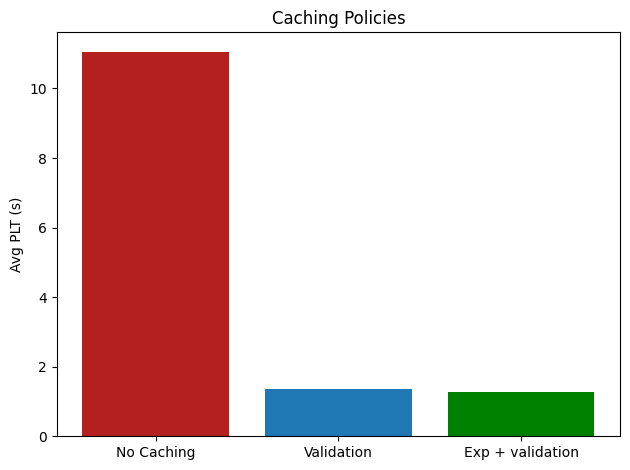

In [5]:
filt_nocache = df_caching['site_policy'].str.contains('_nocache')
filt_exp = df_caching['site_policy'].str.contains('_exp')
filt_val = df_caching['site_policy'].str.contains('val')
df_nocache = df_caching[filt_nocache]
df_exp = df_caching[filt_exp]
df_val = df_caching[filt_val]
avg_vals = np.round([df_nocache.avg.mean(), df_exp.avg.mean(), df_val.avg.mean()],2)

#investigate the caching policies (averaging across websites)
c = ['#b41f1f'] + ['#1f77b4'] + ['green']
plt.bar(x = ['No Caching', 'Validation', 'Exp + validation'], height = avg_vals, color = c)
plt.title('Caching Policies')
plt.ylabel('Avg PLT (s)')
plt.tight_layout()

### 3. Comparison of different protocols and caching impact on them
#### Just one website considered with all the three protocols ***HTTP/1.1, HTTP/2*** and ***HTTP/3***. Caching cases: ***no-cache*** and ***expiration + validation***

/tmp/ipykernel_2643/3856953735.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_caching_prot['avg']=df_caching_prot.iloc[:,1:].mean(1)


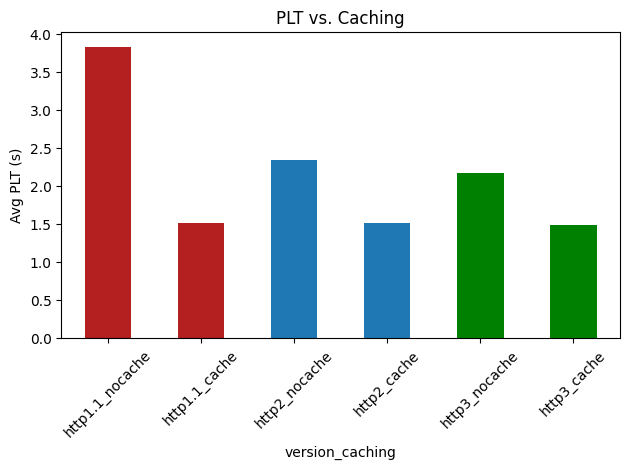

In [6]:
df_caching_prot = pd.read_csv('../Code/Data/3_caching_protocol.csv')
df_caching_prot['avg']=df_caching_prot.iloc[:,1:].mean(1)

#investigate the effect of caching on PLT
c = ['#b41f1f']*2 + ['#1f77b4']*2 + ['green']*2
df_caching_prot.plot(kind='bar',x='protocol',y='avg', rot=45, xlabel= 'version_caching', ylabel = 'Avg PLT (s)', title = 'PLT vs. Caching', legend=False, color = c)
plt.tight_layout()

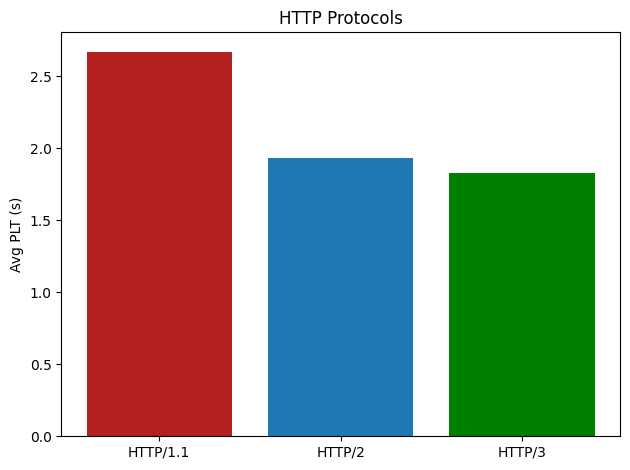

In [7]:
filt_http1 = df_caching_prot['protocol'].str.contains('1.1')
filt_http2 = df_caching_prot['protocol'].str.contains('2')
filt_http3 = df_caching_prot['protocol'].str.contains('3')
df_http1 = df_caching_prot[filt_http1]
df_http2 = df_caching_prot[filt_http2]
df_http3 = df_caching_prot[filt_http3]
avg_vals = np.round([df_http1.avg.mean(), df_http2.avg.mean(), df_http3.avg.mean()],2)

#investigate protocols performance (averaging over all caching policies)
c = ['#b41f1f'] + ['#1f77b4'] + ['green']
plt.bar(x = ['HTTP/1.1', 'HTTP/2', 'HTTP/3'], height = avg_vals, color=c)
plt.title('HTTP Protocols')
plt.ylabel('Avg PLT (s)')
plt.tight_layout()

### 4. Performance of different website, changing ***concurrency*** and ***number of requests*** using the ***ab*** tool
#### The measured metric is the RPS (Requests Per Second)

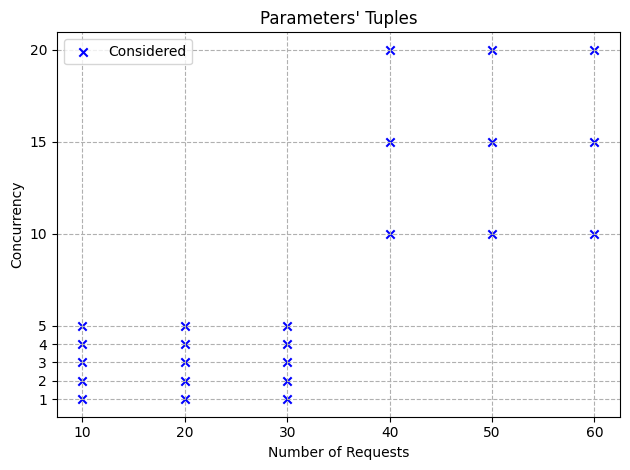

In [8]:
#create a plot for latex showing the used tuple (concurrency, number of requests)

# Data from the table
concurrency = [1, 2, 3, 4, 5, 10, 15, 20]
requests = [10, 20, 30, 40, 50, 60]
considered_tuples = [
    [True, True, True, False, False, False],
    [True, True, True, False, False, False],
    [True, True, True, False, False, False],
    [True, True, True, False, False, False],
    [True, True, True, False, False, False],
    [False, False, False, True, True, True],
    [False, False, False, True, True, True],
    [False, False, False, True, True, True]
]

# Extract the coordinates of considered tuples
considered_x = []
considered_y = []
for i in range(len(concurrency)):
    for j in range(len(requests)):
        if considered_tuples[i][j]:
            considered_x.append(requests[j])
            considered_y.append(concurrency[i])

# Plotting the scatter plot
plt.scatter(considered_x, considered_y, color='blue', marker='x', label='Considered')
plt.xlabel('Number of Requests')
plt.ylabel('Concurrency')
plt.xticks(requests)
plt.yticks(concurrency)
plt.title("Parameters' Tuples")
plt.legend()
plt.grid(True, linestyle='dashed')

plt.tight_layout()
plt.show()



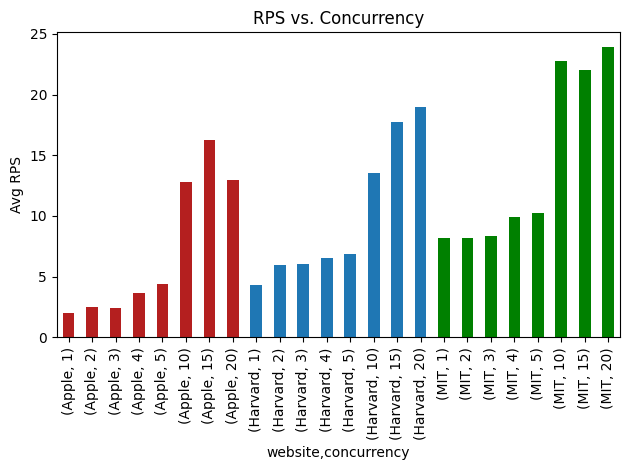

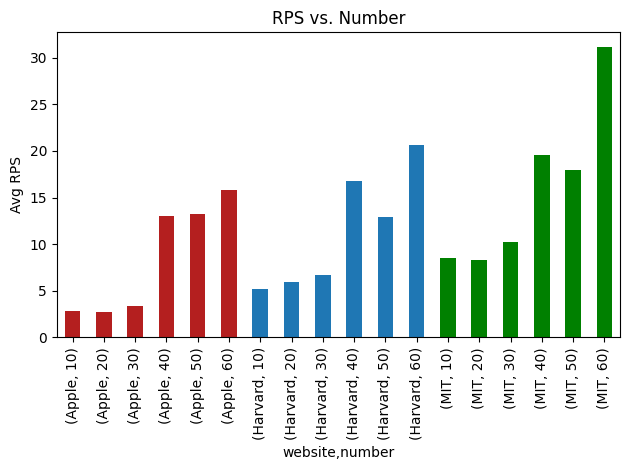

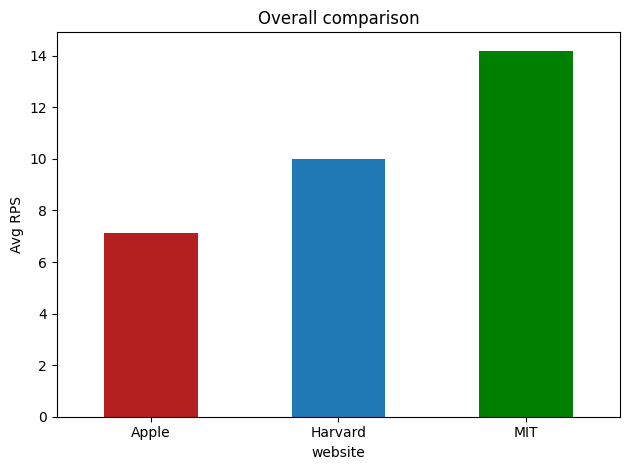

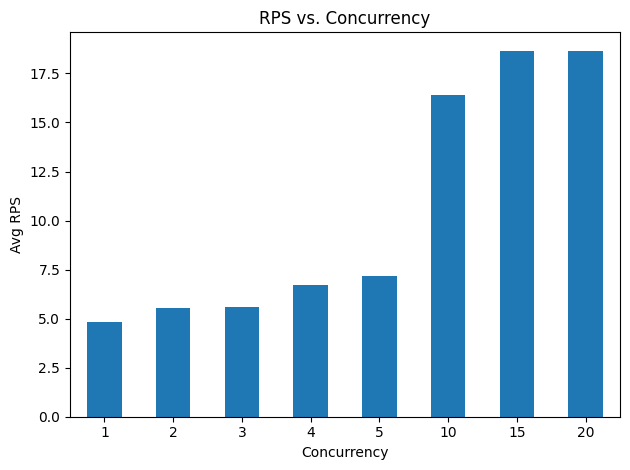

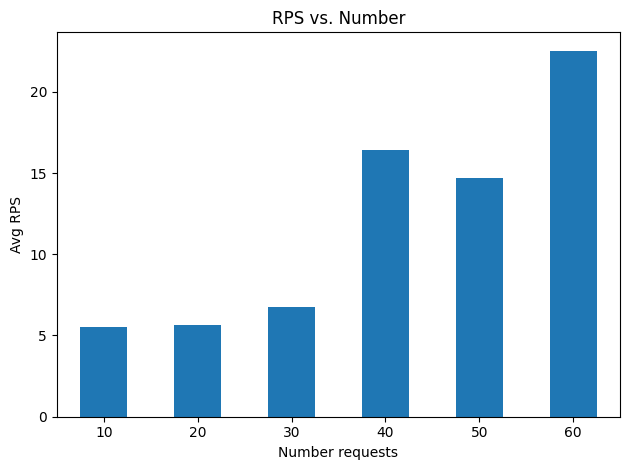

In [9]:
df_ab = pd.read_csv('../Code/Data/4_ab_perf.csv', sep=',') 

#investigate relation between website and concurrency (averaging along number)
c = ['#b41f1f']*8 + ['#1f77b4']*8 + ['green']*8
df_ab.groupby(['website', 'concurrency'])['RPS'].mean().plot(kind = 'bar', rot = 90, ylabel='Avg RPS', title='RPS vs. Concurrency', color=c)
plt.tight_layout()
plt.show()

#investigate relation between website and number (averaging along concurrency)
c = ['#b41f1f']*6 + ['#1f77b4']*6 + ['green']*6
df_ab.groupby(['website', 'number'])['RPS'].mean().plot(kind = 'bar', rot = 90, ylabel='Avg RPS', title='RPS vs. Number', color=c)
plt.tight_layout()
plt.show()

#investigate website performance (averaging along concurrency and number)
c = ['#b41f1f'] + ['#1f77b4'] + ['green']
df_ab.groupby('website')['RPS'].mean().plot(kind = 'bar', rot = 0, ylabel='Avg RPS', title='Overall comparison', color=c)
plt.tight_layout()
plt.show()

#investigate relation between concurrency and RPS (averaging along website and number)
df_ab.groupby('concurrency')['RPS'].mean().plot(kind = 'bar', title = 'RPS vs. Concurrency', ylabel='Avg RPS', xlabel='Concurrency', rot = 0, color='#1f77b4')
plt.tight_layout()
plt.show()

#investigate relation between number and RPS (averaging along website and concurrency)
df_ab.groupby('number')['RPS'].mean().plot(kind = 'bar', title = 'RPS vs. Number', ylabel='Avg RPS', xlabel='Number requests', rot = 0, color='#1f77b4')
plt.tight_layout()
plt.show()


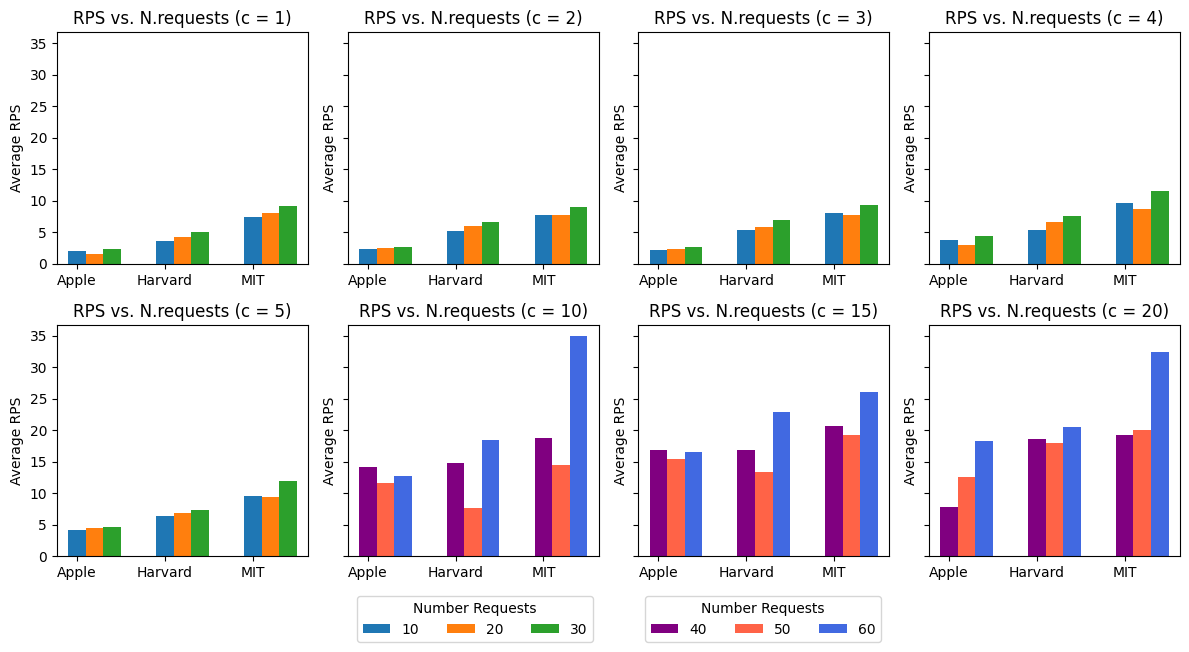

In [39]:
#detailed analysis of websites RPS for each number and concurrency
fil_c1 = df_ab['concurrency'] == 1
fil_c2 = df_ab['concurrency'] == 2
fil_c3 = df_ab['concurrency'] == 3
fil_c4 = df_ab['concurrency'] == 4
fil_c5 = df_ab['concurrency'] == 5
fil_c10 = df_ab['concurrency'] == 10
fil_c15 = df_ab['concurrency'] == 15
fil_c20 = df_ab['concurrency'] == 20

labels = ['Apple', 'Harvard', 'MIT']
requests = [10,20,30]
concurrency_levels = [1, 2, 3, 4, 5, 10, 15, 20]
last_legend_colors = ['purple', '#FF6347', '#4169E1']

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(12, 6), sharey=True)

# Flatten the axes array for easier indexing
axes = axes.flatten()
tmp = 0
for i, ax in enumerate(axes):
    tmp += 1
    concurrency = concurrency_levels[i]
    fil = None
    
    if concurrency == 1:
        fil = fil_c1
        title = f'RPS vs. N.requests (c = {concurrency})'
    elif concurrency == 2:
        fil = fil_c2
        title = f'RPS vs. N.requests (c = {concurrency})'
    elif concurrency == 3:
        fil = fil_c3
        title = f'RPS vs. N.requests (c = {concurrency})'
    elif concurrency == 4:
        fil = fil_c4
        title = f'RPS vs. N.requests (c = {concurrency})'
    elif concurrency == 5:
        fil = fil_c5
        title = f'RPS vs. N.requests (c = {concurrency})'
    elif concurrency == 10:
        fil = fil_c10
        title = f'RPS vs. N.requests (c = {concurrency})'
    elif concurrency == 15:
        fil = fil_c15
        title = f'RPS vs. N.requests (c = {concurrency})'
    elif concurrency == 20:
        fil = fil_c20
        title = f'RPS vs. N.requests (c = {concurrency})'
    
    data = df_ab[fil].pivot(index='website', columns='number', values='RPS')
    x = np.arange(len(labels))
    width = 0.2
    
    if tmp > 5:
        requests = [40,50,60]
    
    for j, req in enumerate(requests):
        if tmp > 5:
            ax.bar(x + j * width, data[req], width, label=f'{req}',color=last_legend_colors[j])
        else:
            ax.bar(x + j * width, data[req], width, label=f'{req}')
    
    ax.set_ylabel('Average RPS')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    #ax.legend()

# Set a common legend for the first five subplots
handles, labels = axes[0].get_legend_handles_labels()

# Create a separate legend for the last three subplots
last_legend_handles = []
last_legend_labels = ['40', '50', '60']

# Generate the handles for the last legend with updated colors
for req, color in zip([40, 50, 60], last_legend_colors):
    last_legend_handles.append(
        mpatches.Patch(facecolor=color, label=f'{req}')
    )

# Assign the legends to the figure
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.4, -0.09), ncol=len(labels), title='Number Requests')
fig.legend(handles=last_legend_handles, labels=last_legend_labels, loc='lower center', bbox_to_anchor=(0.64, -0.09), ncol=len(last_legend_labels), title='Number Requests')


# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [11]:
'''plt.figure(2)
df_ab_c1 = df_ab[fil_c1].pivot(index='website', columns='number', values='RPS').plot(kind='bar', rot=0, ylabel = 'Avg RPS', title = 'RPS vs. N.requests (c = 1)')
plt.tight_layout()
df_ab_c2 = df_ab[fil_c2].pivot(index='website', columns='number', values='RPS').plot(kind='bar', rot=0, ylabel = 'Avg RPS', title = 'RPS vs. N.requests (c = 2)')
plt.tight_layout()
df_ab_c3 = df_ab[fil_c3].pivot(index='website', columns='number', values='RPS').plot(kind='bar', rot=0, ylabel = 'Avg RPS', title = 'RPS vs. N.requests (c = 3)')
plt.tight_layout()
df_ab_c4 = df_ab[fil_c4].pivot(index='website', columns='number', values='RPS').plot(kind='bar', rot=0, ylabel = 'Avg RPS', title = 'RPS vs. N.requests (c = 4)')
plt.tight_layout()
df_ab_c5 = df_ab[fil_c5].pivot(index='website', columns='number', values='RPS').plot(kind='bar', rot=0, ylabel = 'Avg RPS', title = 'RPS vs. N.requests (c = 5)')
plt.tight_layout()
df_ab_c3 = df_ab[fil_c10].pivot(index='website', columns='number', values='RPS').plot(kind='bar', rot=0, ylabel = 'Avg RPS', title = 'RPS vs. N.requests (c = 10)')
plt.tight_layout()
df_ab_c4 = df_ab[fil_c15].pivot(index='website', columns='number', values='RPS').plot(kind='bar', rot=0, ylabel = 'Avg RPS', title = 'RPS vs. N.requests (c = 15)')
plt.tight_layout()
df_ab_c5 = df_ab[fil_c20].pivot(index='website', columns='number', values='RPS').plot(kind='bar', rot=0, ylabel = 'Avg RPS', title = 'RPS vs. N.requests (c = 20)')
plt.tight_layout()
plt.show(2)'''

"plt.figure(2)\ndf_ab_c1 = df_ab[fil_c1].pivot(index='website', columns='number', values='RPS').plot(kind='bar', rot=0, ylabel = 'Avg RPS', title = 'RPS vs. N.requests (c = 1)')\nplt.tight_layout()\ndf_ab_c2 = df_ab[fil_c2].pivot(index='website', columns='number', values='RPS').plot(kind='bar', rot=0, ylabel = 'Avg RPS', title = 'RPS vs. N.requests (c = 2)')\nplt.tight_layout()\ndf_ab_c3 = df_ab[fil_c3].pivot(index='website', columns='number', values='RPS').plot(kind='bar', rot=0, ylabel = 'Avg RPS', title = 'RPS vs. N.requests (c = 3)')\nplt.tight_layout()\ndf_ab_c4 = df_ab[fil_c4].pivot(index='website', columns='number', values='RPS').plot(kind='bar', rot=0, ylabel = 'Avg RPS', title = 'RPS vs. N.requests (c = 4)')\nplt.tight_layout()\ndf_ab_c5 = df_ab[fil_c5].pivot(index='website', columns='number', values='RPS').plot(kind='bar', rot=0, ylabel = 'Avg RPS', title = 'RPS vs. N.requests (c = 5)')\nplt.tight_layout()\ndf_ab_c3 = df_ab[fil_c10].pivot(index='website', columns='number', va

### 5. Performance of different website, changing ***warmup time*** using the ***h2load*** tool
#### The measured metrics are the RPS (Requests Per Second), TPR (Time Per Request) and SD (Standard Deviation)

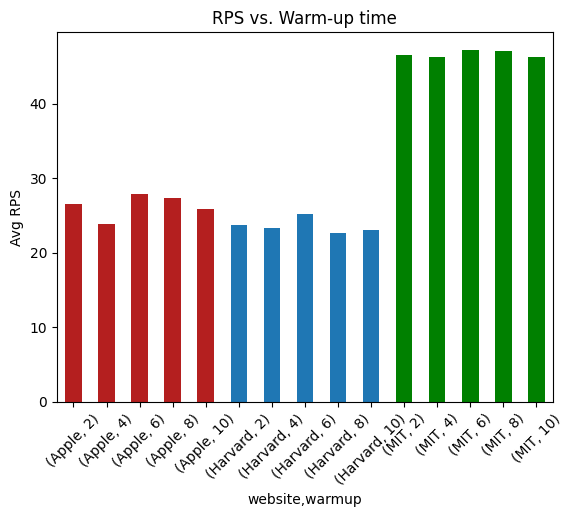

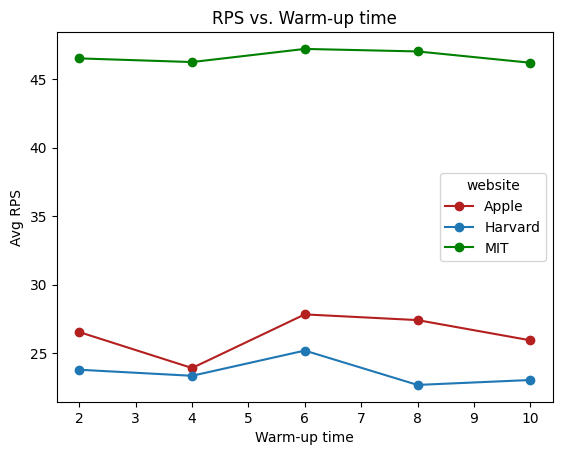

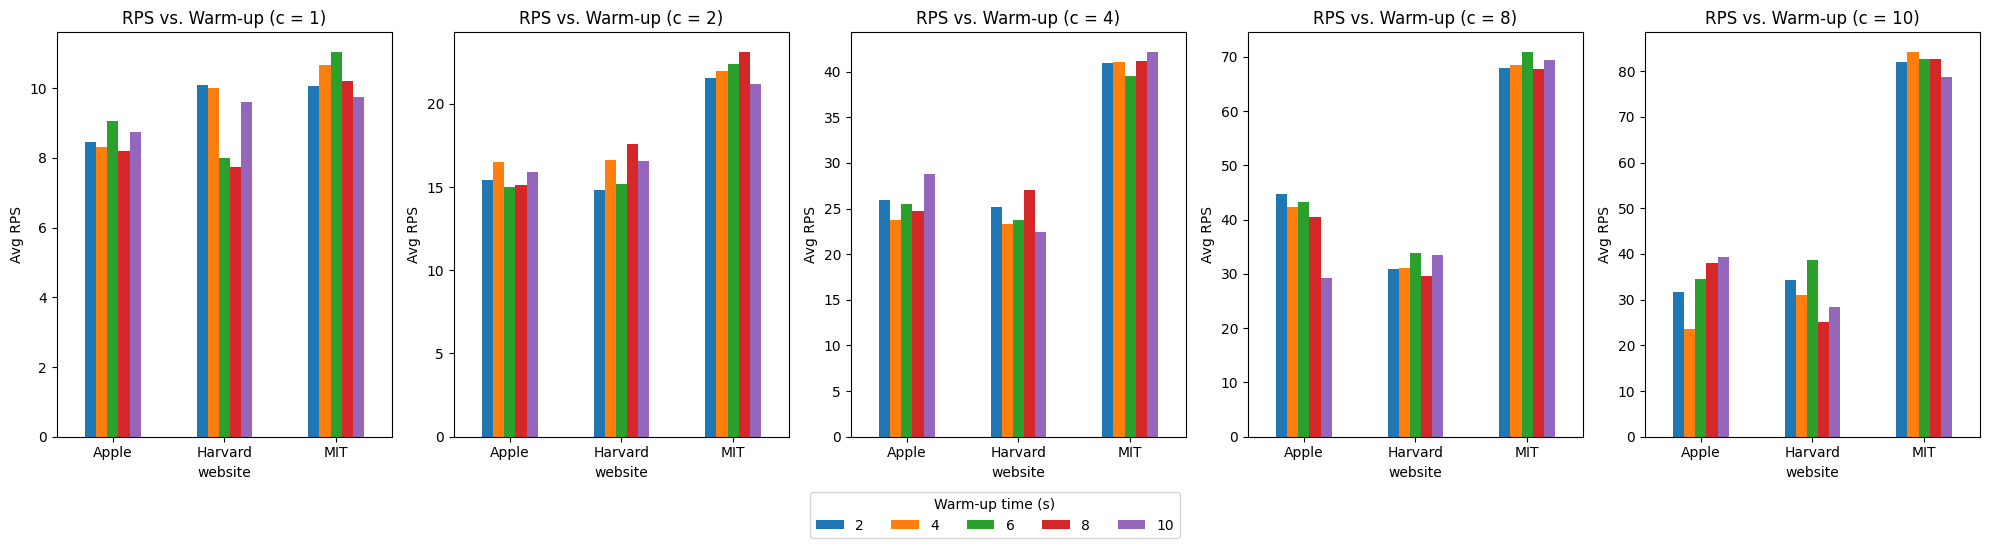

In [9]:
df_h2load = pd.read_csv('Data/5_h2load.csv')

#investigate the realtion between RPS and Warm-up time averaging across concurrency
c = ['#b41f1f']*5 + ['#1f77b4']*5 + ['green']*5 
df_h2load.groupby(['website', 'warmup'])['RPS'].mean().plot(kind='bar', rot=45, ylabel = 'Avg RPS', title = 'RPS vs. Warm-up time', color = c)

#other way to plot the same data
grouped_data = df_h2load.groupby(['website', 'warmup'])['RPS'].mean()
# Reshape the data to have separate columns for each 'website'
pivot_data = grouped_data.unstack('website')
# Plotting the data as separate lines
pivot_data.plot(kind='line', marker='o', rot=0, color = ['#b41f1f', '#1f77b4', 'green'])
# Set labels and title
plt.ylabel('Avg RPS')
plt.xlabel('Warm-up time')
plt.title('RPS vs. Warm-up time')
# Display the plot
plt.show()

#investigate the relation between RPS and Warm-up time for different concurrency levels
filt_c1 = df_h2load['concurrency'] == 1
filt_c2 = df_h2load['concurrency'] == 2
filt_c3 = df_h2load['concurrency'] == 4
filt_c4 = df_h2load['concurrency'] == 8
filt_c5 = df_h2load['concurrency'] == 10

fig, axs = plt.subplots(1,5, figsize=(20,5))
df_h2load[filt_c1].pivot(index='website', columns='warmup', values='RPS').plot(kind='bar', rot=0, ylabel = 'Avg RPS', title = 'RPS vs. Warm-up (c = 1)', ax=axs[0], legend=False)
df_h2load[filt_c2].pivot(index='website', columns='warmup', values='RPS').plot(kind='bar', rot=0, ylabel = 'Avg RPS', title = 'RPS vs. Warm-up (c = 2)', ax=axs[1], legend=False)
df_h2load[filt_c3].pivot(index='website', columns='warmup', values='RPS').plot(kind='bar', rot=0, ylabel = 'Avg RPS', title = 'RPS vs. Warm-up (c = 4)', ax=axs[2], legend=False)
df_h2load[filt_c4].pivot(index='website', columns='warmup', values='RPS').plot(kind='bar', rot=0, ylabel = 'Avg RPS', title = 'RPS vs. Warm-up (c = 8)', ax=axs[3], legend=False)
df_h2load[filt_c5].pivot(index='website', columns='warmup', values='RPS').plot(kind='bar', rot=0, ylabel = 'Avg RPS', title = 'RPS vs. Warm-up (c = 10)', ax=axs[4], legend=False)

# Set a common legend for all subplots
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=len(labels), title = 'Warm-up time (s)')

plt.tight_layout()

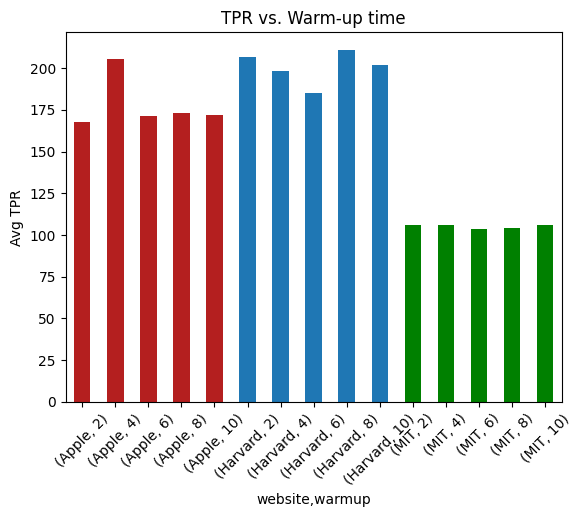

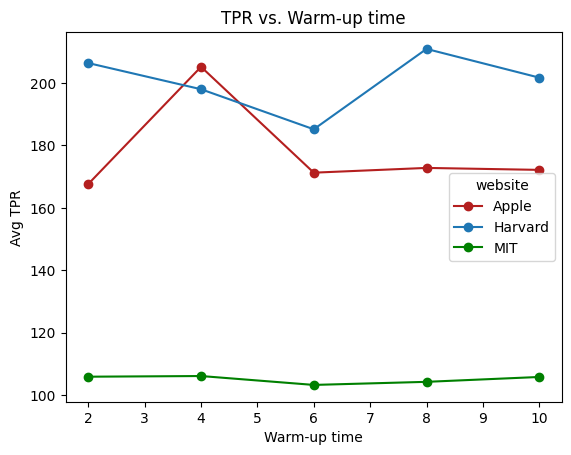

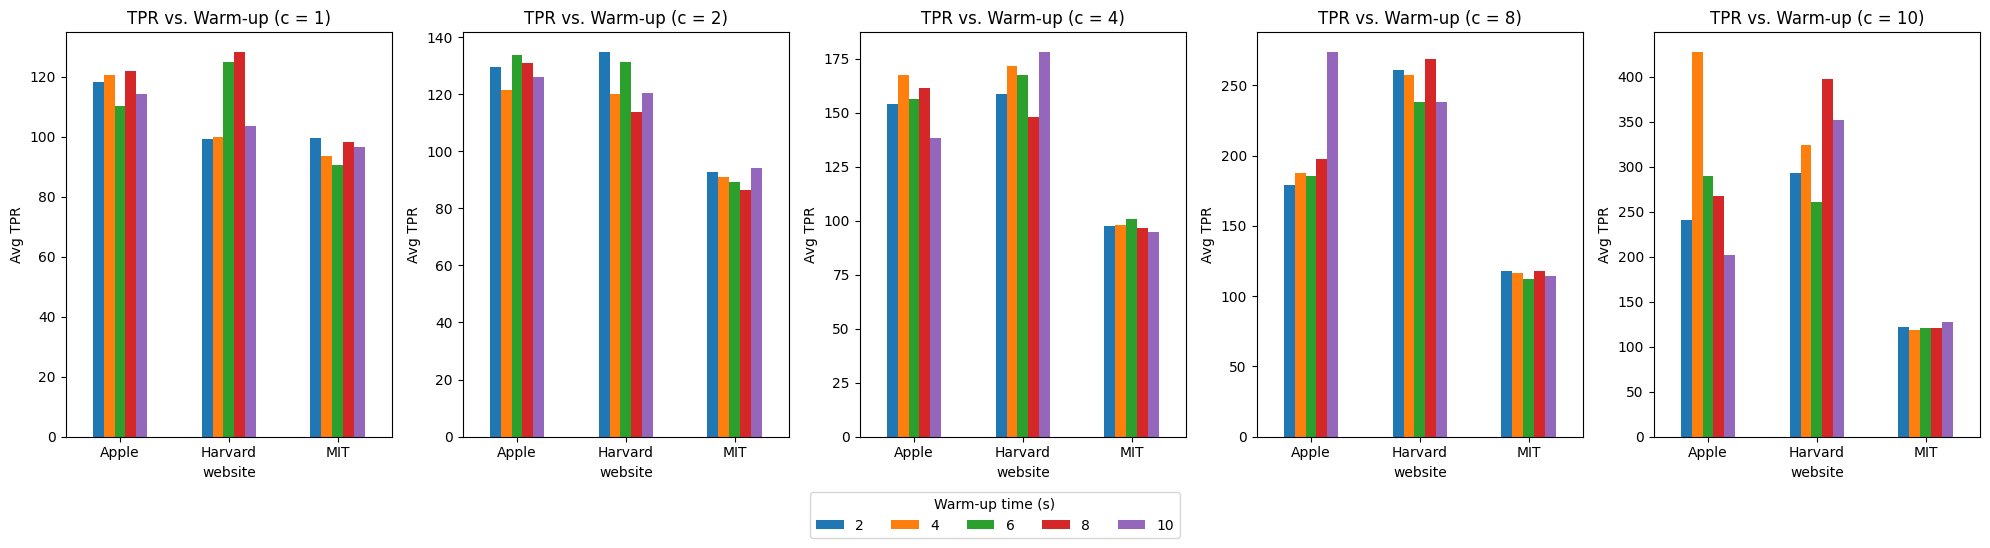

In [13]:
#investigate the relation between TPR and Warm-up time averaging across concurrency
c = ['#b41f1f']*5 + ['#1f77b4']*5 + ['green']*5 
df_h2load.groupby(['website', 'warmup'])['TPR'].mean().plot(kind='bar', rot=45, ylabel = 'Avg TPR', title = 'TPR vs. Warm-up time', color = c)

#other way to plot the same data
grouped_data = df_h2load.groupby(['website', 'warmup'])['TPR'].mean()
# Reshape the data to have separate columns for each 'website'
pivot_data = grouped_data.unstack('website')
# Plotting the data as separate lines
pivot_data.plot(kind='line', marker='o', rot=0, color = ['#b41f1f', '#1f77b4', 'green'])
# Set labels and title
plt.ylabel('Avg TPR')
plt.xlabel('Warm-up time')
plt.title('TPR vs. Warm-up time')
# Display the plot
plt.show()

#investigate the relation between TPR and Warm-up time for different concurrency levels
filt_c1 = df_h2load['concurrency'] == 1
filt_c2 = df_h2load['concurrency'] == 2
filt_c3 = df_h2load['concurrency'] == 4
filt_c4 = df_h2load['concurrency'] == 8
filt_c5 = df_h2load['concurrency'] == 10

fig, axs = plt.subplots(1,5, figsize=(20,5))
df_h2load[filt_c1].pivot(index='website', columns='warmup', values='TPR').plot(kind='bar', rot=0, ylabel = 'Avg TPR', title = 'TPR vs. Warm-up (c = 1)', ax=axs[0], legend=False)
df_h2load[filt_c2].pivot(index='website', columns='warmup', values='TPR').plot(kind='bar', rot=0, ylabel = 'Avg TPR', title = 'TPR vs. Warm-up (c = 2)', ax=axs[1], legend=False)
df_h2load[filt_c3].pivot(index='website', columns='warmup', values='TPR').plot(kind='bar', rot=0, ylabel = 'Avg TPR', title = 'TPR vs. Warm-up (c = 4)', ax=axs[2], legend=False)
df_h2load[filt_c4].pivot(index='website', columns='warmup', values='TPR').plot(kind='bar', rot=0, ylabel = 'Avg TPR', title = 'TPR vs. Warm-up (c = 8)', ax=axs[3], legend=False)
df_h2load[filt_c5].pivot(index='website', columns='warmup', values='TPR').plot(kind='bar', rot=0, ylabel = 'Avg TPR', title = 'TPR vs. Warm-up (c = 10)', ax=axs[4], legend=False)

# Set a common legend for all subplots
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=len(labels), title = 'Warm-up time (s)')

plt.tight_layout()

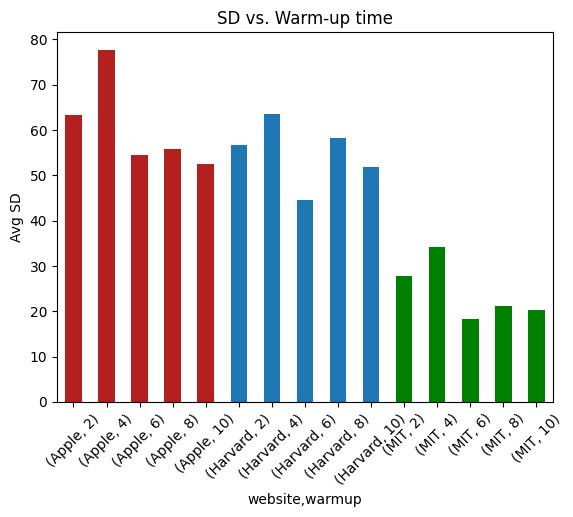

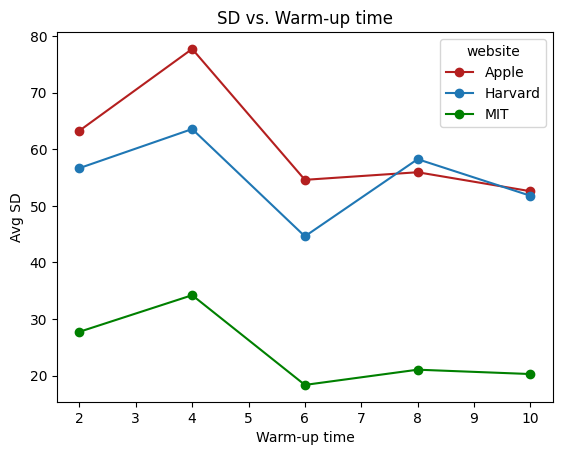

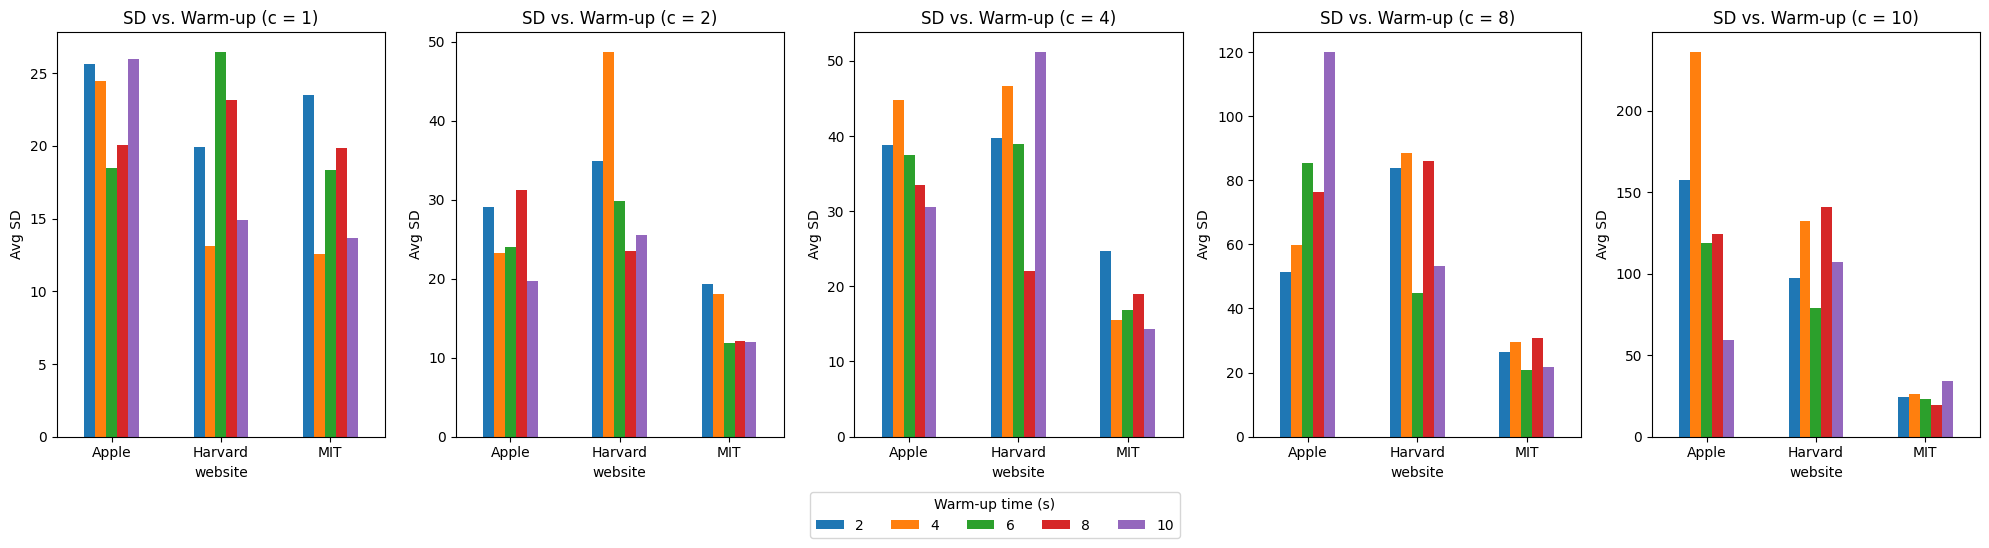

In [10]:
#investigate the realtion between SD and Warm-up time averaging across concurrency
c = ['#b41f1f']*5 + ['#1f77b4']*5 + ['green']*5 
df_h2load.groupby(['website', 'warmup'])['SD'].mean().plot(kind='bar', rot=45, ylabel = 'Avg SD', title = 'SD vs. Warm-up time', color = c)

#other way to plot the same data
grouped_data = df_h2load.groupby(['website', 'warmup'])['SD'].mean()
# Reshape the data to have separate columns for each 'website'
pivot_data = grouped_data.unstack('website')
# Plotting the data as separate lines
pivot_data.plot(kind='line', marker='o', rot=0, color = ['#b41f1f', '#1f77b4', 'green'])
# Set labels and title
plt.ylabel('Avg SD')
plt.xlabel('Warm-up time')
plt.title('SD vs. Warm-up time')
# Display the plot
plt.show()

#investigate the relation between SD and Warm-up time for different concurrency levels
filt_c1 = df_h2load['concurrency'] == 1
filt_c2 = df_h2load['concurrency'] == 2
filt_c3 = df_h2load['concurrency'] == 4
filt_c4 = df_h2load['concurrency'] == 8
filt_c5 = df_h2load['concurrency'] == 10

fig, axs = plt.subplots(1,5, figsize=(20,5))
df_h2load[filt_c1].pivot(index='website', columns='warmup', values='SD').plot(kind='bar', rot=0, ylabel = 'Avg SD', title = 'SD vs. Warm-up (c = 1)', ax=axs[0], legend=False)
df_h2load[filt_c2].pivot(index='website', columns='warmup', values='SD').plot(kind='bar', rot=0, ylabel = 'Avg SD', title = 'SD vs. Warm-up (c = 2)', ax=axs[1], legend=False)
df_h2load[filt_c3].pivot(index='website', columns='warmup', values='SD').plot(kind='bar', rot=0, ylabel = 'Avg SD', title = 'SD vs. Warm-up (c = 4)', ax=axs[2], legend=False)
df_h2load[filt_c4].pivot(index='website', columns='warmup', values='SD').plot(kind='bar', rot=0, ylabel = 'Avg SD', title = 'SD vs. Warm-up (c = 8)', ax=axs[3], legend=False)
df_h2load[filt_c5].pivot(index='website', columns='warmup', values='SD').plot(kind='bar', rot=0, ylabel = 'Avg SD', title = 'SD vs. Warm-up (c = 10)', ax=axs[4], legend=False)

# Set a common legend for all subplots
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=len(labels), title = 'Warm-up time (s)')

plt.tight_layout()